In [1]:
# We import all necessary libraries.
from pathlib import Path
import pandas as pd
import ujson
import re
import unidecode
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


GRAFO PRE 8M

In [2]:
# We import the csv file of the graph.
file_pre_8M = r'C:\UOC\TFM\Analisis\pre_8M\analisis_despues_de_limpieza\grafo_pre_8M.csv'
df_pre_8M = pd.read_csv(file_pre_8M)
df_pre_8M.head(5)

Id            Label  timeset  weighted indegree  \
0    ppitarchpronk    ppitarchpronk      NaN                  0   
1  Adolfo_Villalba  Adolfo_Villalba      NaN                474   
2        vicbogino        vicbogino      NaN                  0   
3           PPiiNA           PPiiNA      NaN                  2   
4  SinGENEROdDUDAS  SinGENEROdDUDAS      NaN                  9   

   weighted outdegree  weighted degree  Eccentricity  closnesscentrality  \
0                   1                1            25            0.098470   
1                   2              476            24            0.109180   
2                   3                3            23            0.116938   
3                   2                4            23            0.116896   
4                  10               19            23            0.130379   

   harmonicclosnesscentrality  betweenesscentrality  modularity_class  \
0                    0.117040          0.000000e+00                14   
1                    0.136900          1.150767e+06                14   
2                    0.137753          0.000000e+00                 6   
3                    0.137398          3.402905e+02                 6   
4                    0.159543          9.382095e+06                 6   

   componentnumber  
0                0  
1                0  
2                0  
3                0  
4                0

In [3]:
# We create a dictionary to fill it up with communities' id and all their nodes.
comm_dict_pre_8M = dict()

for index, row in df_pre_8M.iterrows():
    # If the community already exists add just the node id to the community.
    if row[10] in comm_dict_pre_8M:
        comm_dict_pre_8M[row[10]].append(row[0])
    # If the community doesn't exist in the dictionary, create it and add the node id to it.
    else:
        comm_dict_pre_8M[row[10]] = [row[0]]

# We create a function that gets the community id of the user you write as input.
def get_key(val): 
    for key, value in comm_dict_pre_8M.items(): 
         if val in value: 
             return key 

In [4]:
# We define where the json files with complete tweets are located.
complete_tweets_pre_8M = r'C:\UOC\TFM\Analisis\pre_8M\analisis_despues_de_limpieza\wordclouds\6_7_M'

In [5]:
# We create string objects where we are going to save the texts of all the tweets published by each community.
text_comm_14 = ""
text_comm_42 = ""
text_comm_9 = ""
text_comm_1 = ""
text_comm_22 = ""
text_comm_6 = ""
text_comm_8 = ""
text_comm_71 = ""
text_comm_30 = ""
text_comm_49 = ""
text_comm_38 = ""

# We create counters for each community.
counter14 = 0
counter42 = 0
counter9 = 0
counter1 = 0
counter22 = 0
counter6 = 0
counter8 = 0
counter71 = 0
counter30 = 0
counter49 = 0
counter38 = 0


# We iterate over all files located in the defined folder.
for file in Path(complete_tweets_pre_8M).glob('*.json'):
    # For each line of the file.
    for line in open(file, 'r', encoding="utf8"):
        # Skip empty lines.
        if not line.strip (): 
            continue
        # If the line contains a tweet.
        if line.startswith('{"created_at":') or line.startswith('{"contributors":'):
            # Get the name of the tweet originator and its community.
            user_name = ujson.loads(line)['user']['screen_name']
            community = get_key(user_name)
            # Get the text of the tweet.
            if ujson.loads(line)['truncated'] == 'true':
                text = ujson.loads(line)['extended_tweet']['full_text']
            else:
                text = ujson.loads(line)['text']
            # If the community id is one that we want to study, add the text of the tweet to the correspondent object.    
            if community == 14:
                text_comm_14 = text_comm_14 + text
                counter14 = counter14 + 1 
            if community == 42:
                text_comm_42 = text_comm_42 + text
                counter42 = counter42 + 1
            if community == 9:
                text_comm_9 = text_comm_9 + text
                counter9 = counter9 + 1
            if community == 1:
                text_comm_1 = text_comm_1 + text
                counter1 = counter1 + 1
            if community == 22:
                text_comm_22 = text_comm_22 + text
                counter22 = counter22 + 1
            if community == 6:
                text_comm_6 = text_comm_6 + text
                counter6 = counter6 + 1
            if community == 8:
                text_comm_8 = text_comm_8 + text
                counter8 = counter8 + 1
            if community == 71:
                text_comm_71 = text_comm_71 + text
                counter71 = counter71 + 1
            if community == 30:
                text_comm_30 = text_comm_30 + text
                counter30 = counter30 + 1
            if community == 49:
                text_comm_49 = text_comm_49 + text
                counter49 = counter49 + 1
            if community == 38:
                text_comm_38 = text_comm_38 + text
                counter38 = counter38 + 1
            
# Print results.
print("Se han encontrado {} tweets de la comunidad número 14.".format(counter14))
print("Se han encontrado {} tweets de la comunidad número 42.".format(counter42))
print("Se han encontrado {} tweets de la comunidad número 9.".format(counter9))
print("Se han encontrado {} tweets de la comunidad número 1.".format(counter1))
print("Se han encontrado {} tweets de la comunidad número 22.".format(counter22))
print("Se han encontrado {} tweets de la comunidad número 6.".format(counter6))
print("Se han encontrado {} tweets de la comunidad número 8.".format(counter8))
print("Se han encontrado {} tweets de la comunidad número 71.".format(counter71))
print("Se han encontrado {} tweets de la comunidad número 30.".format(counter30))
print("Se han encontrado {} tweets de la comunidad número 49.".format(counter49))
print("Se han encontrado {} tweets de la comunidad número 38.".format(counter38))


Se han encontrado 8571 tweets de la comunidad número 14.
Se han encontrado 7839 tweets de la comunidad número 42.
Se han encontrado 8104 tweets de la comunidad número 9.
Se han encontrado 11786 tweets de la comunidad número 1.
Se han encontrado 4255 tweets de la comunidad número 22.
Se han encontrado 3412 tweets de la comunidad número 6.
Se han encontrado 2593 tweets de la comunidad número 8.
Se han encontrado 2838 tweets de la comunidad número 71.
Se han encontrado 2936 tweets de la comunidad número 30.
Se han encontrado 2083 tweets de la comunidad número 49.
Se han encontrado 2567 tweets de la comunidad número 38.


In [6]:
# We create a function to clean the communities' text files.
def cleanText(text):
    # We remove hashtags.
    remove_hash = re.sub(r"#[\w']+", '', text)
    # We remove mentions to other users.
    remove_mentions = re.sub(r"@[\w']+", '', remove_hash)
    # We remove urls.
    remove_links = re.sub(r"(www|http:|https:)+[^\s]+[\w]", '', remove_mentions)
    # We remove the RTs.
    remove_rt = re.sub(r"RT", '', remove_links)
    # We remove accents.
    remove_acc = unidecode.unidecode(remove_rt)
    # We remove all characters that are not letters, numbers or whitespaces.
    remove_punct = re.sub(r'[^A-Za-z\s\d]+', '', remove_acc)
    # We transform all characters to lower case.
    to_lower_case = re.sub(r'[A-Z]+', lambda x: x.group(0).lower(), remove_punct)
    # We split the text in words so we can remove double whitespaces, new lines...
    words = to_lower_case.split()
    # We remove short tokens (length 1, 2 and 3) to avoid not important words to appear as most important (e.g. articles 
    # like "el", "la", "los"...)
    words = [word for word in words if not (len(word) == 1 or len(word) == 2 or len(word) == 3)]
    # We join again all splitted words in a text.
    final_text = ' '.join(words)
    
    return (final_text)

In [7]:
# We clean the communities text objects.
clean_text_14 = cleanText(text_comm_14)
clean_text_42 = cleanText(text_comm_42)
clean_text_9 = cleanText(text_comm_9)
clean_text_1 = cleanText(text_comm_1)
clean_text_22 = cleanText(text_comm_22)
clean_text_6 = cleanText(text_comm_6)
clean_text_8 = cleanText(text_comm_8)
clean_text_71 = cleanText(text_comm_71)
clean_text_30 = cleanText(text_comm_30)
clean_text_49 = cleanText(text_comm_49)
clean_text_38 = cleanText(text_comm_38)


In [8]:
# We create a list of stopwords that are not important and won't appear in our wordclouds.
my_stopwords = set(STOPWORDS)
my_stopwords.update(["este", "esto", "esta", "estos", "estas", "para", "pero", "aquest", "cada", "molt", "perque", "porque",  
                     "contra", "entre", "como", "desde", "sobre", "tambien", "tambe", "mucho"])
# We create a function that creates a wordcloud from the text it receives as inpunt, and prints the top 10 words.
def create_wordcloud(text):
    wordcloud = WordCloud(max_font_size = 50, max_words = 200, background_color = "white", normalize_plurals = False, 
                          collocations = False, stopwords = my_stopwords).generate(text)
    plt.figure(figsize=(15, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    print("TOP 10 WORDS:\n")
    print(list(wordcloud.words_)[0:10])

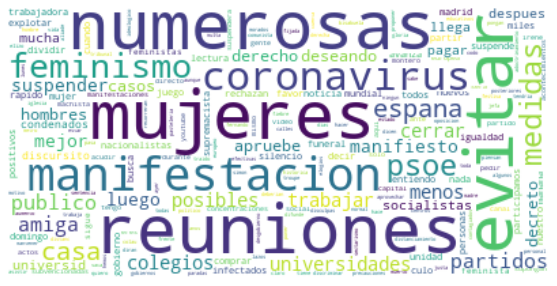

TOP 10 WORDS:

['mujeres', 'evitar', 'reuniones', 'numerosas', 'manifestacion', 'coronavirus', 'feminismo', 'medidas', 'psoe', 'espana']


In [9]:
# We create the wordclouds of the different communities.
create_wordcloud(clean_text_14)

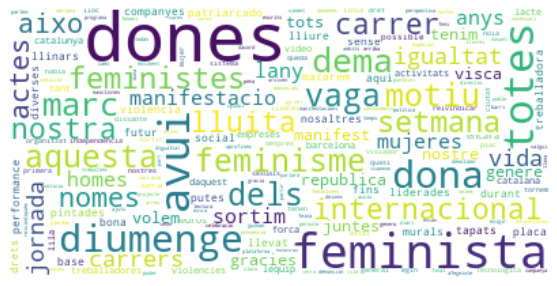

TOP 10 WORDS:

['dones', 'feminista', 'avui', 'totes', 'diumenge', 'dona', 'dema', 'marc', 'aquesta', 'vaga']


In [10]:
create_wordcloud(clean_text_42)

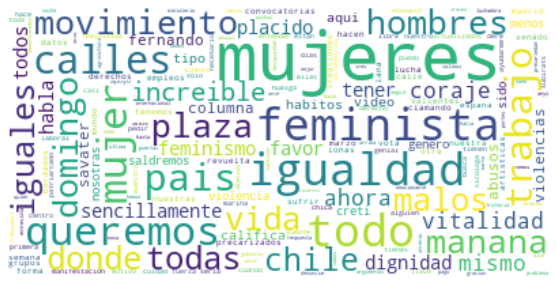

TOP 10 WORDS:

['mujeres', 'igualdad', 'todo', 'feminista', 'mujer', 'queremos', 'calles', 'pais', 'trabajo', 'movimiento']


In [11]:
create_wordcloud(clean_text_9)

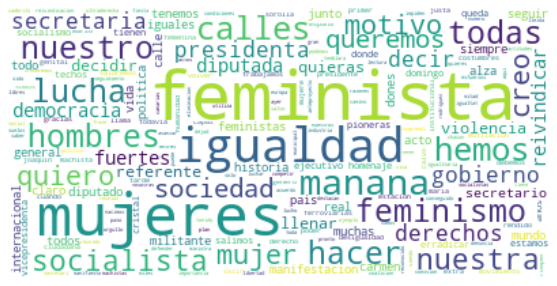

TOP 10 WORDS:

['feminista', 'mujeres', 'igualdad', 'manana', 'hemos', 'calles', 'nuestro', 'hacer', 'todas', 'feminismo']


In [12]:
create_wordcloud(clean_text_1)

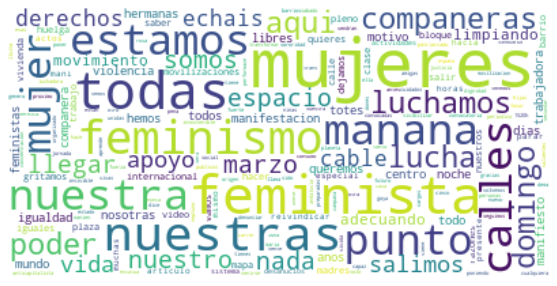

TOP 10 WORDS:

['mujeres', 'feminista', 'todas', 'nuestras', 'feminismo', 'estamos', 'calles', 'nuestra', 'manana', 'punto']


In [13]:
create_wordcloud(clean_text_22)

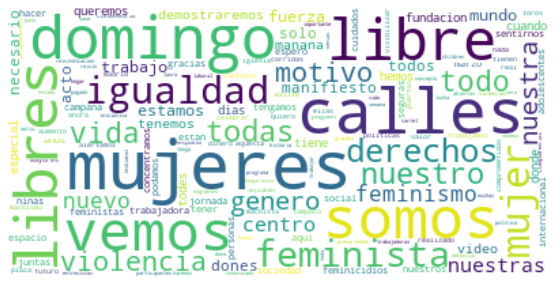

TOP 10 WORDS:

['mujeres', 'calles', 'domingo', 'somos', 'libres', 'libre', 'vemos', 'mujer', 'igualdad', 'feminista']


In [14]:
create_wordcloud(clean_text_6)

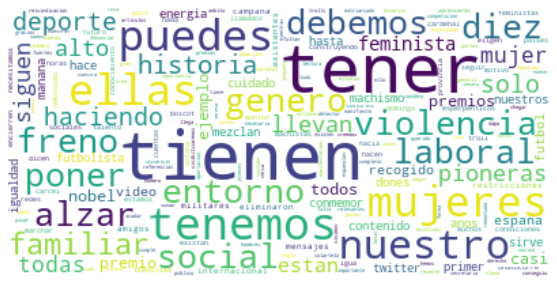

TOP 10 WORDS:

['tienen', 'tener', 'tenemos', 'ellas', 'puedes', 'mujeres', 'nuestro', 'diez', 'violencia', 'genero']


In [15]:
create_wordcloud(clean_text_8)

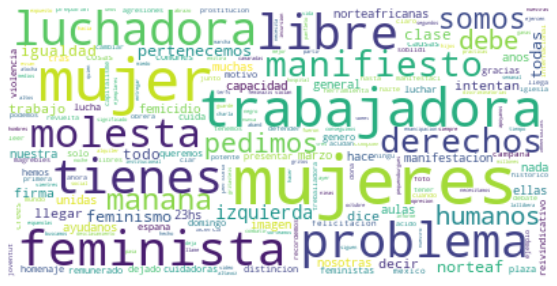

TOP 10 WORDS:

['mujeres', 'mujer', 'trabajadora', 'feminista', 'tienes', 'libre', 'problema', 'luchadora', 'molesta', 'manifiesto']


In [16]:
create_wordcloud(clean_text_71)

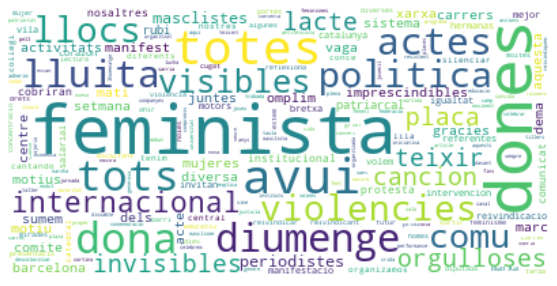

TOP 10 WORDS:

['feminista', 'dones', 'avui', 'totes', 'dona', 'tots', 'diumenge', 'lluita', 'actes', 'politica']


In [17]:
create_wordcloud(clean_text_30)

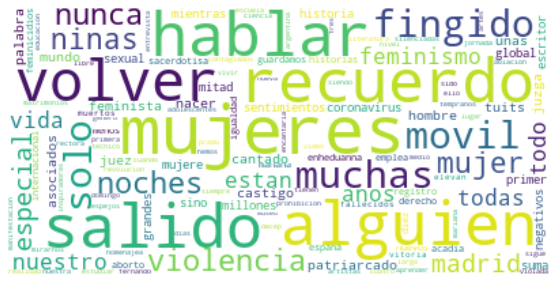

TOP 10 WORDS:

['mujeres', 'hablar', 'salido', 'recuerdo', 'alguien', 'volver', 'fingido', 'movil', 'solo', 'muchas']


In [18]:
create_wordcloud(clean_text_49)

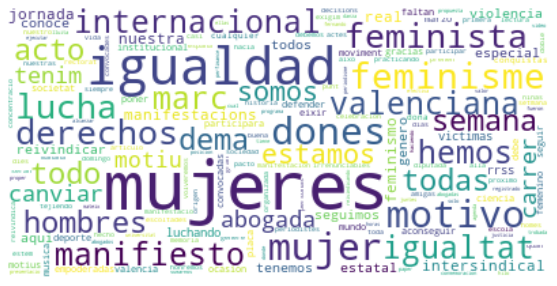

TOP 10 WORDS:

['mujeres', 'igualdad', 'motivo', 'dones', 'mujer', 'feminisme', 'lucha', 'feminista', 'derechos', 'internacional']


In [19]:
create_wordcloud(clean_text_38)

GRAFO 8M

In [20]:
# We repeat exactly the same steps we did with the first graph. If any additional information to understand the code is 
# required, please check the comments of the first graph analysis.


file_8M = r'C:\UOC\TFM\Analisis\8M\analisis_despues_de_limpieza\grafo_8M.csv'
df_8M = pd.read_csv(file_8M)
df_8M.head(5)

Id            Label  timeset  weighted indegree  \
0  cridapremiadalt  cridapremiadalt      NaN                 13   
1     CUPMaBcnnord     CUPMaBcnnord      NaN                  2   
2         Llampico         Llampico      NaN                 33   
3   Planeta_Futuro   Planeta_Futuro      NaN                 37   
4           Borxu_           Borxu_      NaN                  0   

   weighted outdegree  weighted degree  modularity_class  componentnumber  \
0                   4               17                23                1   
1                   9               11                23                1   
2                   2               35                 1                1   
3                   4               41                 3                1   
4                   2                2                28                1   

   Eccentricity  closnesscentrality  harmonicclosnesscentrality  \
0            23            0.092281                    0.098022   
1            22            0.101640                    0.109600   
2            20            0.100112                    0.106927   
3            20            0.106057                    0.112869   
4            20            0.102363                    0.107233   

   betweenesscentrality  
0          79641.828890  
1          99352.328890  
2         225466.117110  
3         604180.141551  
4              0.000000

In [21]:
comm_dict_8M = dict()

for index, row in df_8M.iterrows():
    if row[6] in comm_dict_8M:
        comm_dict_8M[row[6]].append(row[0])
    else:
        comm_dict_8M[row[6]] = [row[0]]

def get_key(val): 
    for key, value in comm_dict_8M.items(): 
         if val in value: 
             return key 


In [22]:
complete_tweets_8M = r'C:\UOC\TFM\Analisis\8M\analisis_despues_de_limpieza\wordclouds\8M'

In [23]:
text_comm_22 = ""
text_comm_28 = ""
text_comm_16 = ""
text_comm_23 = ""
text_comm_24 = ""
text_comm_41 = ""
text_comm_7 = ""
text_comm_1 = ""
text_comm_2 = ""

counter22 = 0
counter28 = 0
counter16 = 0
counter23 = 0
counter24 = 0
counter41 = 0
counter7 = 0
counter1 = 0
counter2 = 0

for file in Path(complete_tweets_8M).glob('*.json'):
    for line in open(file, 'r', encoding="utf8"):
        if not line.strip (): 
            continue
        if line.startswith('{"created_at":') or line.startswith('{"contributors":'):
            user_name = ujson.loads(line)['user']['screen_name']
            community = get_key(user_name)
            if ujson.loads(line)['truncated'] == 'true':
                text = ujson.loads(line)['extended_tweet']['full_text']
            else:
                text = ujson.loads(line)['text']
                
            if community == 22:
                text_comm_22 = text_comm_22 + text
                counter22 = counter22 + 1 
            if community == 28:
                text_comm_28 = text_comm_28 + text
                counter28 = counter28 + 1
            if community == 16:
                text_comm_16 = text_comm_16 + text
                counter16 = counter16 + 1
            if community == 23:
                text_comm_23 = text_comm_23 + text
                counter23 = counter23 + 1
            if community == 24:
                text_comm_24 = text_comm_24 + text
                counter24 = counter24 + 1
            if community == 41:
                text_comm_41 = text_comm_41 + text
                counter41 = counter41 + 1
            if community == 7:
                text_comm_7 = text_comm_7 + text
                counter7 = counter7 + 1
            if community == 1:
                text_comm_1 = text_comm_1 + text
                counter1 = counter1 + 1
            if community == 2:
                text_comm_2 = text_comm_2 + text
                counter2 = counter2 + 1
            
print("Se han encontrado {} tweets de la comunidad número 22.".format(counter22))
print("Se han encontrado {} tweets de la comunidad número 28.".format(counter28))
print("Se han encontrado {} tweets de la comunidad número 16.".format(counter16))
print("Se han encontrado {} tweets de la comunidad número 23.".format(counter23))
print("Se han encontrado {} tweets de la comunidad número 24.".format(counter24))
print("Se han encontrado {} tweets de la comunidad número 41.".format(counter41))
print("Se han encontrado {} tweets de la comunidad número 7.".format(counter7))
print("Se han encontrado {} tweets de la comunidad número 1.".format(counter1))
print("Se han encontrado {} tweets de la comunidad número 2.".format(counter2))


Se han encontrado 63298 tweets de la comunidad número 22.
Se han encontrado 73011 tweets de la comunidad número 28.
Se han encontrado 48610 tweets de la comunidad número 16.
Se han encontrado 44369 tweets de la comunidad número 23.
Se han encontrado 28077 tweets de la comunidad número 24.
Se han encontrado 22737 tweets de la comunidad número 41.
Se han encontrado 21573 tweets de la comunidad número 7.
Se han encontrado 34481 tweets de la comunidad número 1.
Se han encontrado 13296 tweets de la comunidad número 2.


In [24]:
clean_text_22 = cleanText(text_comm_22)
clean_text_28 = cleanText(text_comm_28)
clean_text_16 = cleanText(text_comm_16)
clean_text_23 = cleanText(text_comm_23)
clean_text_24 = cleanText(text_comm_24)
clean_text_41 = cleanText(text_comm_41)
clean_text_7 = cleanText(text_comm_7)
clean_text_1 = cleanText(text_comm_1)
clean_text_2 = cleanText(text_comm_2)


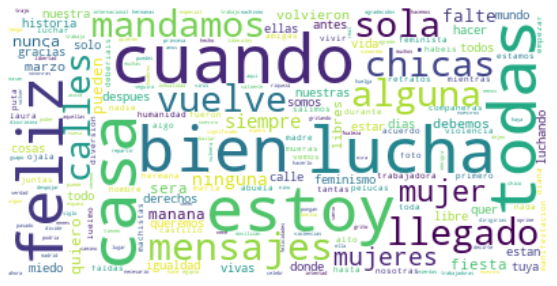

TOP 10 WORDS:

['cuando', 'todas', 'casa', 'lucha', 'estoy', 'feliz', 'bien', 'mensajes', 'llegado', 'chicas']


In [25]:
create_wordcloud(clean_text_22)

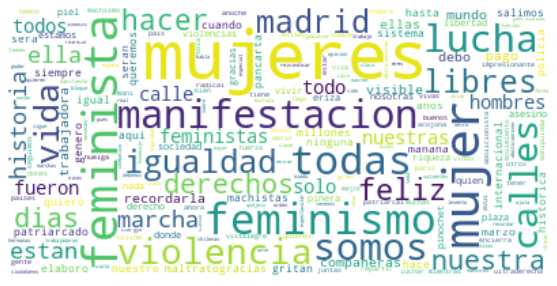

TOP 10 WORDS:

['mujeres', 'mujer', 'feminista', 'feminismo', 'todas', 'manifestacion', 'somos', 'lucha', 'calles', 'violencia']


In [26]:
create_wordcloud(clean_text_28)

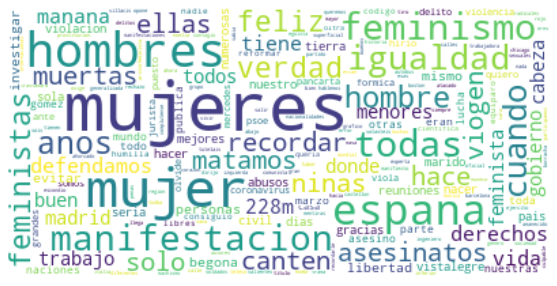

TOP 10 WORDS:

['mujeres', 'mujer', 'hombres', 'espana', 'todas', 'feminismo', 'manifestacion', 'igualdad', 'cuando', 'anos']


In [27]:
create_wordcloud(clean_text_16)

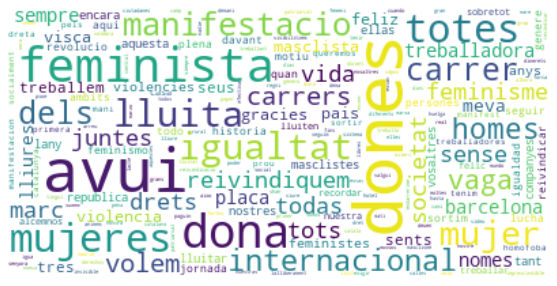

TOP 10 WORDS:

['dones', 'avui', 'feminista', 'dona', 'totes', 'mujeres', 'lluita', 'igualtat', 'mujer', 'manifestacio']


In [28]:
create_wordcloud(clean_text_23)

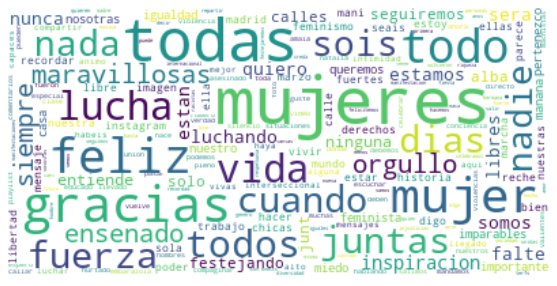

TOP 10 WORDS:

['mujeres', 'todas', 'gracias', 'mujer', 'feliz', 'todo', 'lucha', 'vida', 'todos', 'juntas']


In [29]:
create_wordcloud(clean_text_24)

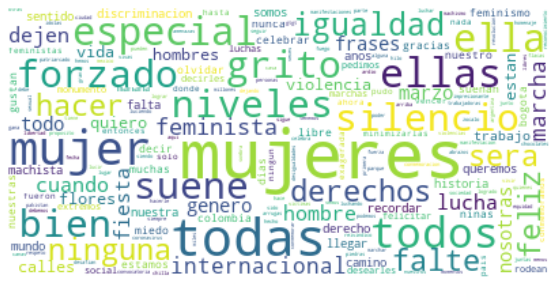

TOP 10 WORDS:

['mujeres', 'todas', 'mujer', 'todos', 'ellas', 'ella', 'especial', 'bien', 'silencio', 'grito']


In [30]:
create_wordcloud(clean_text_41)

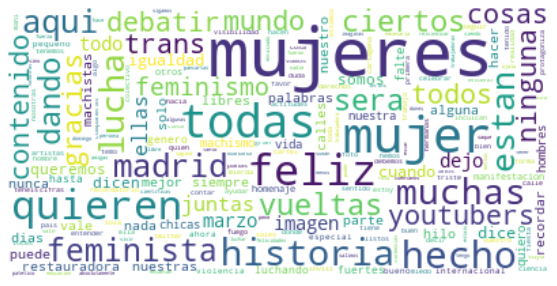

TOP 10 WORDS:

['mujeres', 'mujer', 'todas', 'feliz', 'quieren', 'hecho', 'historia', 'muchas', 'lucha', 'estan']


In [31]:
create_wordcloud(clean_text_7)

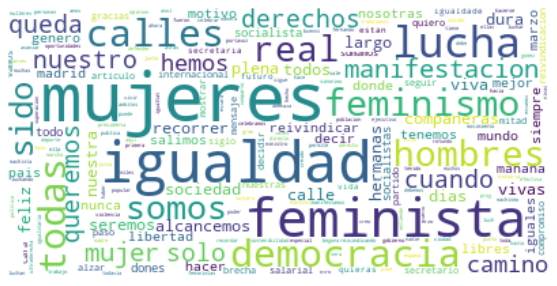

TOP 10 WORDS:

['mujeres', 'igualdad', 'feminista', 'lucha', 'todas', 'calles', 'democracia', 'feminismo', 'real', 'hombres']


In [32]:
create_wordcloud(clean_text_1)

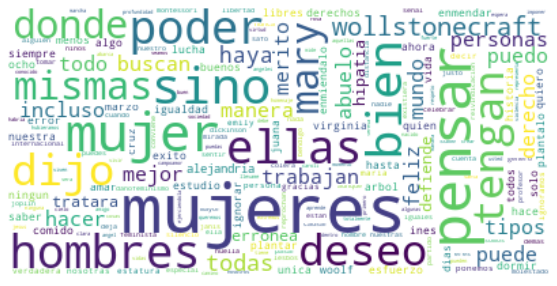

TOP 10 WORDS:

['mujeres', 'pensar', 'mujer', 'sino', 'bien', 'ellas', 'poder', 'hombres', 'dijo', 'tengan']


In [33]:
create_wordcloud(clean_text_2)

GRAFO POST 8M

In [34]:
# We repeat exactly the same steps we did with the first graph. If any additional information to understand the code is 
# required, please check the comments of the first graph analysis.


file_post_8M = r'C:\UOC\TFM\Analisis\post_8M\analisis_despues_de_limpieza\grafo_post_8M.csv'
df_post_8M = pd.read_csv(file_post_8M)
df_post_8M.head(5)

Id          Label  timeset  weighted indegree  \
0   lorenzomedia   lorenzomedia      NaN                  0   
1       Alvisepf       Alvisepf      NaN               2882   
2        policia        policia      NaN               2944   
3  Descatalogada  Descatalogada      NaN                  0   
4  SuperVioletas  SuperVioletas      NaN                223   

   weighted outdegree  weighted degree  modularity_class  componentnumber  \
0                   2                2                 6                0   
1                   1             2883                 6                0   
2                   0             2944                 6                0   
3                  10               10                28                0   
4                   5              228                28                0   

   Eccentricity  closnesscentrality  harmonicclosnesscentrality  \
0             1            1.000000                    1.000000   
1             1            1.000000                    1.000000   
2             0            0.000000                    0.000000   
3            11            0.178808                    0.281782   
4            10            0.180352                    0.243360   

   betweenesscentrality  
0              0.000000  
1             17.833333  
2              0.000000  
3              0.000000  
4          22716.416667

In [35]:
comm_dict_post_8M = dict()

for index, row in df_post_8M.iterrows():
    if row[6] in comm_dict_post_8M:
        comm_dict_post_8M[row[6]].append(row[0])
    else:
        comm_dict_post_8M[row[6]] = [row[0]]

def get_key(val): 
    for key, value in comm_dict_post_8M.items(): 
         if val in value: 
             return key 


In [36]:
complete_tweets_post_8M = r'C:\UOC\TFM\Analisis\post_8M\analisis_despues_de_limpieza\wordclouds\9_10_M'

In [37]:
text_comm_6 = ""
text_comm_28 = ""
text_comm_9 = ""
text_comm_25 = ""

counter6 = 0
counter28 = 0
counter9 = 0
counter25 = 0

for file in Path(complete_tweets_post_8M).glob('*.json'):
    for line in open(file, 'r', encoding="utf8"):
        if not line.strip (): 
            continue
        if line.startswith('{"created_at":') or line.startswith('{"contributors":'):
            user_name = ujson.loads(line)['user']['screen_name']
            community = get_key(user_name)
            if ujson.loads(line)['truncated'] == 'true':
                text = ujson.loads(line)['extended_tweet']['full_text']
            else:
                text = ujson.loads(line)['text']
                
            if community == 6:
                text_comm_6 = text_comm_6 + text
                counter6 = counter6 + 1 
            if community == 28:
                text_comm_28 = text_comm_28 + text
                counter28 = counter28 + 1
            if community == 9:
                text_comm_9 = text_comm_9 + text
                counter9 = counter9 + 1
            if community == 25:
                text_comm_25 = text_comm_25 + text
                counter25 = counter25 + 1
                            

print("Se han encontrado {} tweets de la comunidad número 6.".format(counter6))
print("Se han encontrado {} tweets de la comunidad número 28.".format(counter28))
print("Se han encontrado {} tweets de la comunidad número 9.".format(counter9))
print("Se han encontrado {} tweets de la comunidad número 25.".format(counter25))


Se han encontrado 29934 tweets de la comunidad número 6.
Se han encontrado 20082 tweets de la comunidad número 28.
Se han encontrado 9002 tweets de la comunidad número 9.
Se han encontrado 11915 tweets de la comunidad número 25.


In [38]:
clean_text_6 = cleanText(text_comm_6)
clean_text_28 = cleanText(text_comm_28)
clean_text_9 = cleanText(text_comm_9)
clean_text_25 = cleanText(text_comm_25)


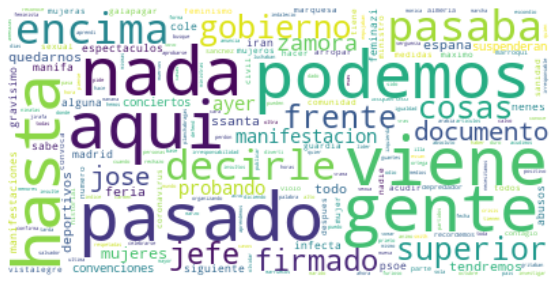

TOP 10 WORDS:

['nada', 'viene', 'pasado', 'podemos', 'hasta', 'gente', 'aqui', 'pasaba', 'encima', 'decirle']


In [39]:
create_wordcloud(clean_text_6)

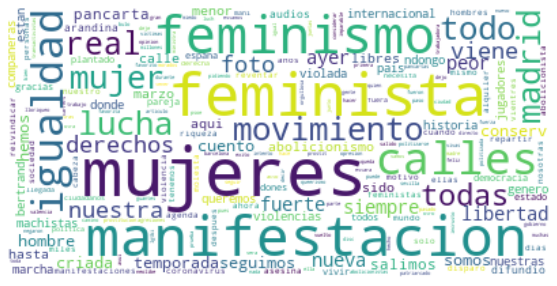

TOP 10 WORDS:

['mujeres', 'feminista', 'manifestacion', 'feminismo', 'calles', 'igualdad', 'movimiento', 'todo', 'lucha', 'madrid']


In [40]:
create_wordcloud(clean_text_28)

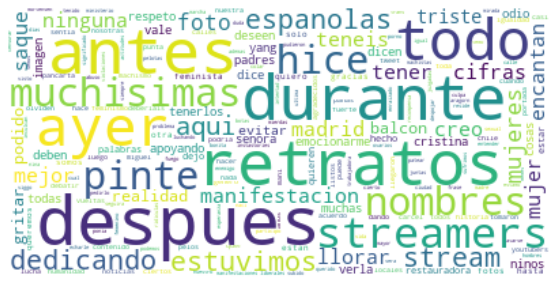

TOP 10 WORDS:

['despues', 'retratos', 'antes', 'durante', 'todo', 'ayer', 'streamers', 'muchisimas', 'hice', 'pinte']


In [41]:
create_wordcloud(clean_text_9)

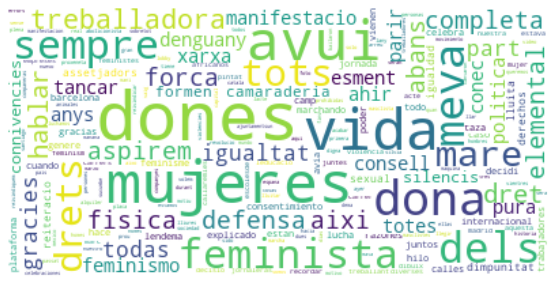

TOP 10 WORDS:

['dones', 'mujeres', 'vida', 'avui', 'dona', 'meva', 'dels', 'feminista', 'sempre', 'tots']


In [42]:
create_wordcloud(clean_text_25)